In [76]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#import plotly.plotly as py

In [77]:
#Three observed trends
#Observation 1
#Observation 2
#Observation 3

In [78]:
#Setting up Original DFs. 
city_df = pd.read_csv("hw_Resources/city_data.csv")
ride_df =pd.read_csv("hw_Resources/ride_data.csv")
ride_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [79]:
len(ride_df)

2375

In [80]:
city_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [81]:
len(city_df)

126

In [82]:
#Merging df on cities

pyber_df=pd.merge(ride_df, city_df, how="outer", on="city")
pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


In [83]:
#Eliminating Columns in Reduced DF

pyber_df = pyber_df.iloc[:,[0,2,3,4,5]]
pyber_df.head()

,city,fare,ride_id,driver_count,type
0,Sarabury,38.35,5403689035038,46,Urban
1,Sarabury,21.76,7546681945283,46,Urban
2,Sarabury,38.03,4932495851866,46,Urban
3,Sarabury,26.82,6711035373406,46,Urban
4,Sarabury,30.30,6388737278232,46,Urban


In [84]:
len(pyber_df)

2407

In [85]:
#Your objective is to build a Bubble Plot that showcases the 
#    relationship between four key variables:

#COLOR SCHEME GOLD, LIGHT SKY BLUE, AND LIGHT CORAL

#Average Fare ($) Per City          ========= Can calculate from Riders_df
#Total Number of Rides Per City     ========= must calculate from Riders_df
#Total Number of Drivers Per City =========== Given in City_df
#City Type (Urban, Suburban, Rural) ========= Given in City_df

In [86]:
#Calculating the Av. Fare/City using the Merged DF (seems like i didn't need a merge)

cpCity = pyber_df[["city","fare"]].groupby("city").mean()
cpCity=cpCity.reset_index()                               # This lines reset the Indexes for Aesthetics
cpCity.style.format({'fare': '${:.2f}'})                  #formats fare for $$$$
#cpCity = cpCity.sort_values(["city"], ascending=True)
cpCity.head()

,city,fare
0,Alvarezhaven,23.928710
1,Alyssaberg,20.609615
2,Anitamouth,37.315556
3,Antoniomouth,23.625000
4,Aprilchester,21.981579


In [87]:
len(cpCity)

125

In [88]:

#TypeCity=city_df[["city","type"]].groupby("type").group()
TypeCity=city_df.groupby("type").count()
#TypeCity = TypeCity.sort_values(["city"], ascending=True)
TypeCity.head()

,city,driver_count
type,,
Rural,18,18
Suburban,42,42
Urban,66,66


In [89]:
len(TypeCity["city"])

3

In [90]:
TypeCity=TypeCity.reset_index()
TypeCity

,type,city,driver_count
0,Rural,18,18
1,Suburban,42,42
2,Urban,66,66


In [91]:
#Not needed
#found driver per cit on combined....

DpC= pyber_df[["city","driver_count"]].groupby("city").mean()
DpC = DpC.rename(columns={"driver_count":"# of Drivers Per City"})
DpC=DpC.reset_index()
DpC.head()

,city,# of Drivers Per City
0,Alvarezhaven,21
1,Alyssaberg,67
2,Anitamouth,16
3,Antoniomouth,21
4,Aprilchester,49


In [92]:
len(DpC)

125

In [93]:
#Calculate total riders using Ride_df

TotRiders=ride_df[["city","ride_id"]].groupby("city").count()
#TotRiders = TotRiders.sort_values(["city"], ascending=True)
TotRiders = TotRiders.rename(columns={"ride_id":"# of Riders Per City"})
TotRiders=TotRiders.reset_index()
TotRiders.head()

,city,# of Riders Per City
0,Alvarezhaven,31
1,Alyssaberg,26
2,Anitamouth,9
3,Antoniomouth,22
4,Aprilchester,19


In [94]:
len(TotRiders)

125

In [106]:
#I need a merge to build final dF
#Average Fare ($) Per City          ========= cpCity
#Total Number of Rides Per City     ========= TotRiders
#Total Number of Drivers Per City =========== DpC
#City Type (Urban, Suburban, Rural) ========= city_df


merged_pyber = pd.merge(cpCity, TotRiders, how="outer", on="city")
merged_pyber = pd.merge(merged_pyber, DpC, how="outer", on="city")
merged_pyber = pd.merge(merged_pyber, city_df, how="outer", on="city")
merged_pyber = merged_pyber.iloc[:,[0,1,2,3,5]]
merged_pyber.head()



,city,fare,# of Riders Per City,# of Drivers Per City,type
0,Alvarezhaven,23.928710,31,21,Urban
1,Alyssaberg,20.609615,26,67,Urban
2,Anitamouth,37.315556,9,16,Suburban
3,Antoniomouth,23.625000,22,21,Urban
4,Aprilchester,21.981579,19,49,Urban


In [121]:
#Crate df for each type of city so i can plot each in its own color
#GOLD, LIGHT SKY BLUE, AND LIGHT CORAL

urban_df = merged_pyber.loc[merged_pyber["type"] == "Urban"]
suburban_df = merged_pyber.loc[merged_pyber["type"] == "Suburban"]
rural_df= merged_pyber.loc[merged_pyber["type"] == "Rural"]
urban_df.head()

,city,fare,# of Riders Per City,# of Drivers Per City,type
0,Alvarezhaven,23.928710,31,21,Urban
1,Alyssaberg,20.609615,26,67,Urban
3,Antoniomouth,23.625000,22,21,Urban
4,Aprilchester,21.981579,19,49,Urban
5,Arnoldview,25.106452,31,41,Urban


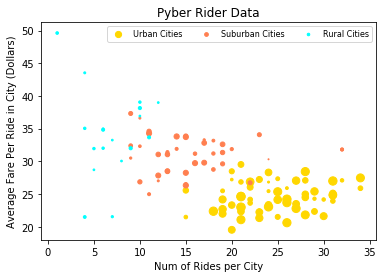

In [130]:
#Create the scatter plot of each df and then plot it with the chart properties



a=plt.scatter(urban_df['# of Riders Per City'], urban_df['fare'],s= urban_df['# of Drivers Per City'], c='gold')
b=plt.scatter(suburban_df['# of Riders Per City'], suburban_df['fare'],s= suburban_df['# of Drivers Per City'], c='coral')
c=plt.scatter(rural_df['# of Riders Per City'], rural_df['fare'],s= rural_df['# of Drivers Per City'], c='cyan')
plt.title("Pyber Rider Data")
plt.xlabel("Num of Rides per City")
plt.ylabel("Average Fare Per Ride in City (Dollars)")

plt.legend((a, b, c), ('Urban Cities', 'Suburban Cities', 'Rural Cities'), scatterpoints=1,
            loc='upper right',
            ncol=3,
            fontsize=8)

plt.show()


In [100]:
#In addition, you will be expected to produce the following 
    #three pie charts:
    
#COLOR SCHEME GOLD, LIGHT SKY BLUE, AND LIGHT CORAL

#'% of Total Fares by City Type
#'% of Total Rides by City Type
#'% of Total Drivers by City Type

In [101]:
#========================================================================
#Total fare per city
#========================================================================

fareTSum= pyber_df[["type","fare"]].groupby("type").sum()
fareTSum=fareTSum.reset_index()
fareTSum

,type,fare
0,Rural,4255.09
1,Suburban,20335.69
2,Urban,40078.34


In [102]:
#========================================================================
#Total fare calculation from original data
#========================================================================

totalFare=ride_df["fare"].sum()
totalFare

63651.30999999986

In [103]:
#========================================================================
#Total fare calculation from dataframe that seperates fare total by city type
#========================================================================


totalFare2=fareTSum["fare"].sum()

totalFare2

64669.11999999997

In [104]:
#========================================================================
#Rides sum per City Type
#========================================================================


ridesTSum= pyber_df[["type","fare"]].groupby("type").count()
ridesTSum=ridesTSum.reset_index()
ridesTSum

,type,fare
0,Rural,125
1,Suburban,657
2,Urban,1625


In [105]:
#========================================================================
#Driver sums per City Type
#========================================================================

driverTSum= city_df[["type","driver_count"]].groupby("type").sum()
driverTSum=driverTSum.reset_index()
driverTSum

,type,driver_count
0,Rural,104
1,Suburban,638
2,Urban,2607
